In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

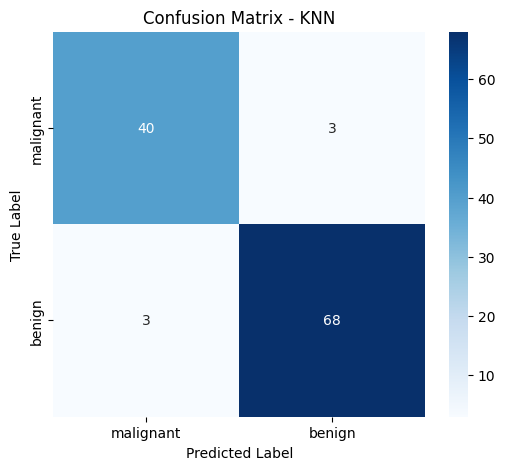


Classification Report for KNN:

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



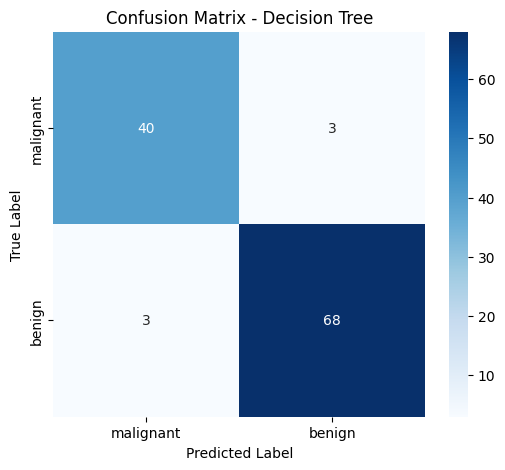


Classification Report for Decision Tree:

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



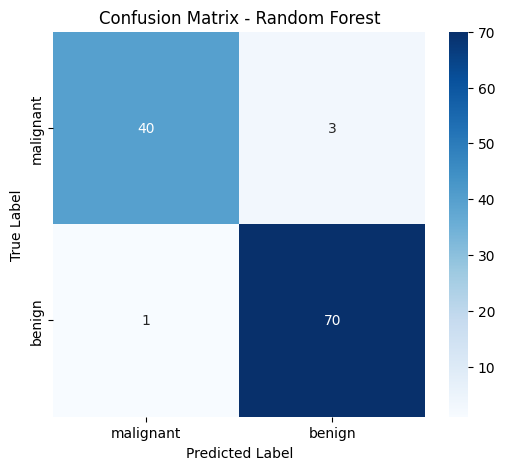


Classification Report for Random Forest:

              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.947368,0.957746,0.957746,0.957746
1,Decision Tree,0.947368,0.957746,0.957746,0.957746
2,Random Forest,0.964912,0.958904,0.985915,0.972222


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = []

# Train, predict, and evaluate each model
for name, model in classifiers.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # Display classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

# Convert results to DataFrame
metrics_df = pd.DataFrame(results)

display(metrics_df)

In [5]:
# Define hyperparameter variations
hyperparameter_variations = [
    {"model": "KNN", "n_neighbors": n} for n in [1, 3, 5, 10, 15]
] + [
    {"model": "Decision Tree", "max_depth": d} for d in [3, 5, 10, None]
] + [
    {"model": "Decision Tree", "min_samples_split": m} for m in [2, 10]
] + [
    {"model": "Random Forest", "max_depth": d, "n_estimators": n} 
    for d in [3, 5, 10, None] for n in [50, 100, 200]
] + [
    {"model": "Random Forest", "max_features": f} for f in ['sqrt', 'log2']
]

# Store results
ablation_results = []

# Train, predict, and evaluate models in one loop
for params in hyperparameter_variations:
    model_name = params.pop("model")  # Extract model type
    if model_name == "KNN":
        model = KNeighborsClassifier(**params)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=42, **params)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42, **params)
    
    # Train model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Compute metrics
    ablation_results.append({
        "Model": f"{model_name} {params}",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

# Convert results to DataFrame
ablation_metrics_df = pd.DataFrame(ablation_results)

display(ablation_metrics_df)

,Model,Accuracy,Precision,Recall,F1-score
0,KNN {'n_neighbors': 1},0.938596,0.944444,0.957746,0.951049
1,KNN {'n_neighbors': 3},0.947368,0.957746,0.957746,0.957746
2,KNN {'n_neighbors': 5},0.947368,0.957746,0.957746,0.957746
3,KNN {'n_neighbors': 10},0.956140,0.971429,0.957746,0.964539
4,KNN {'n_neighbors': 15},0.956140,0.958333,0.971831,0.965035
5,Decision Tree {'max_depth': 3},0.947368,0.945205,0.971831,0.958333
6,Decision Tree {'max_depth': 5},0.947368,0.957746,0.957746,0.957746
7,Decision Tree {'max_depth': 10},0.947368,0.957746,0.957746,0.957746
8,Decision Tree {'max_depth': None},0.947368,0.957746,0.957746,0.957746
9,Decision Tree {'min_samples_split': 2},0.947368,0.957746,0.957746,0.957746
